# Homework 6 writeup solutions

## Name: Zach Gendreau 

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Part a - Create a meshgrid

You don't need to go through all of these individual parts if you want, it's just to help you organize your work.

In [16]:
# Define the theta values
thetas = np.linspace(-3*np.pi, 3*np.pi, 25) # Solve up to t=1
# Define the v values
vs = np.linspace(-3, 3, 25) # Plot for x between 0 and 1

# Create the mesh
# To do this, we need a meshgrid... You create it below!
T, V = np.meshgrid(thetas, vs)

### Part b - Create a quiver plot

Text(0, 0.5, 'vs')

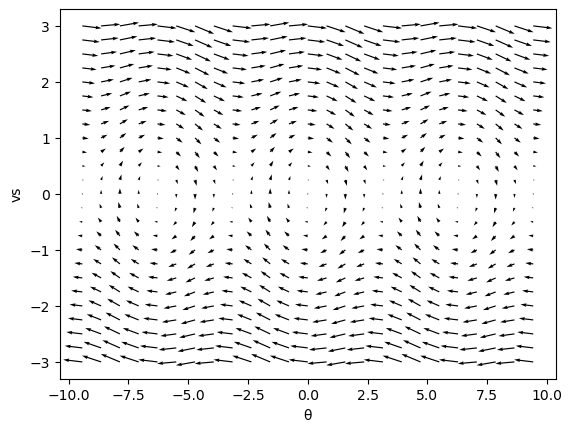

In [39]:
fig, ax = plt.subplots()
g = 9.8
L = 11
sigma = 0.12
theta_prime = lambda t, y: y[1]
v_prime = lambda t, y: -1*(g/L)*np.sin(y[0]) - sigma*y[1]

theta_prime_mesh = theta_prime(0, [T, V])
v_prime_mesh = v_prime(0, [T, V])

ax.quiver(T, V, theta_prime_mesh,v_prime_mesh)
ax.set_xlabel('θ')
ax.set_ylabel('vs')

### Part d - Include trajectories.

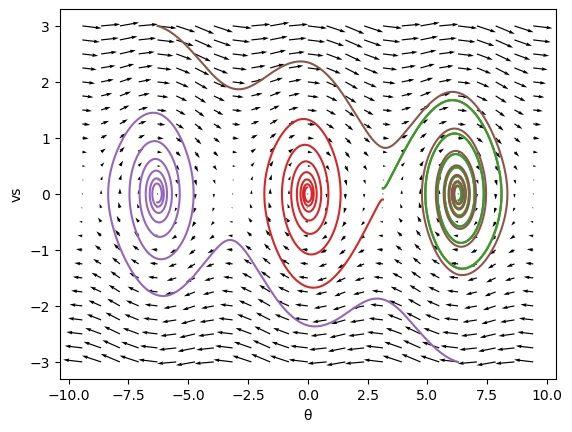

In [50]:
import scipy.optimize

dt = 0.01
tspan = np.arange(0,50+dt,dt)
odefun = lambda t, y: [y[1], -1*(g/L)*np.sin(y[0]) - sigma*y[1]]

def quiv_func(theta_init, v_init):
    y0 = [theta_init, v_init]
    sol = scipy.integrate.solve_ivp(odefun, [0, 50], y0, t_eval = tspan)
    vsol = sol.y
    thetas = vsol[0, :]
    vs = vsol[1, :]
    ax.plot(thetas, vs)

quiv_func(np.pi, 0.1)
quiv_func(np.pi, -0.1)
quiv_func(2*np.pi, -3)
quiv_func(-2*np.pi, 3)

fig

### Part e - axis display

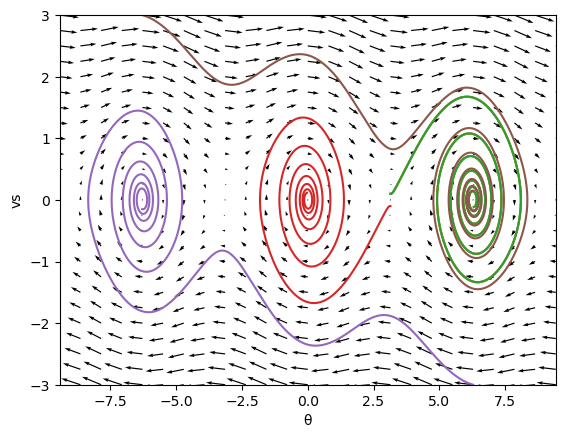

In [52]:
ax.set_xlim([-3*np.pi, 3*np.pi])
ax.set_ylim([-3, 3])
fig

### Part f - Discussion

#### Part (i) - long-term behavior

As time increases, regardless of initial conditions, the pendulum has the same behavior. As seen on the above graph, the theta values as time increases are either -2pi, 0, or 2pi. Physically, these are all the same locations, some have just rotated a whole 2pi radians either positively or negatively. The swirling motion around these ending angles relates to the dampening of the oscillation; they start with higher angular velocity, then over time, decrease until they are at rest(or very close)

#### Part (ii) - Comparing two solutions with $\theta_0 = \pi$. 

Both of these initial conditions begin at an angle of deflection pi. Considering the mass is initally hanging straight down with a deflection angle of 0, a deflection angle of pi infers that we begin with the pendulum perfectly over the hinge (one half rotation). Then, one condition calls for an initial velocity of -0.1, which is a slight push to the left. The other calls for an initial velocity of 0.1, or a slight push to the right. Both of these pedulums fall down towards the resting point, then oscillate back and forth, with reducing angular velocity, until they come to rest. The two solutions are basically "mirror images" of eachother. The go through the same absolute motion, just beginning at different sides. *Oscillation refers to the repetetive motion of the pendulum around its equilibrium*





#### Part (iii) - Comparing two solutions with equal and opposite $\theta_0$ and $v_0$. 



For these initial conditions, the pendulum is "wrapped" around its equilibrium point exactly 2pi radians(1 full rotation). Then the pendulums are applied with a force resulting in a 3m/s velocity either clockwise or counterclockwise. Based on the graph, we can see that the mass travels one full rotation back to equilibrium point, and then one more full rotation to the opposite phase as its starting point. Over time, the velocity of the mass decreases to a resting state. Once again, the motion of these two initial positions are considered "mirror images" of each other. 